In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

C:\Users\Yves\python\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
#device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters

input_size = 784 # 28*28

hidden_size = 100
batch_size = 100
num_classes = 10
num_epochs = 2
learning_rate = 0.001

# MNIST

train_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor(), download =True)

test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor() )

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


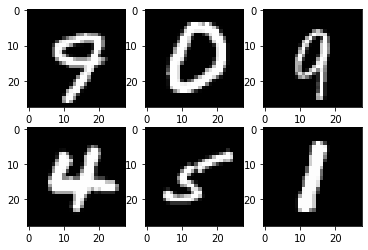

In [3]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
    
plt.show()

In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)                                             
        

In [13]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #forward pass
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch + 1}/ {num_epochs}, step {i+1}/ {n_total_steps}, loss = {loss.item(): .4f}')
            
#test

with torch.no_grad():
    n_correct = 0
    n_samples =0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        
        # value, index
        
        _, predictions = torch.max(outputs, 1) # this is the class label
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
        
        #accuracey
        
acc = 100.0 *n_correct/n_samples
print(f'accuracy = {acc}')

epoch 1/ 2, step 100/ 100, loss =  0.0882
epoch 2/ 2, step 100/ 100, loss =  0.2252
accuracy = 0.94
